<a id="atributes"></a>
### **1. Reconhecimento de Atributos**

Esta etapa consiste no entendimento do dataset de modo geral, relacionando suas dimensões, seus exemplos, representando os registros e entradas, e atributos, representando suas colunas e características. Os atributos, por sua vez, podem ser investigados quanto ao seu tipo, escala, valores únicos, etc. Para esta etapa, é aconselhável também acessar os dicionários dos dados, caso existam, a fim de ter uma dimensão maior da natureza e detalhes importantes dos dados.

<a id="univariate"></a>
### **2. Análise Univariada**

Esta etapa consiste na descrição dos dados avaliando seus atributos, um por vez. Dessa forma, é possível visualizar as distribuições das variáveis e seus respectivos parâmetros estatísticos que os descrevem.

<a id="multivariate"></a>
### **3. Análise Multivariada**

Esta etapa consiste na descrição dos dados avaliando seus atributos em conjunto. Dessa forma, é possível visualizar correlações entre as variáveis e seus respectivos parâmetros estatísticos que os descrevem.

<a id="aberrant"></a>
### **4. Deteção de Anomalias**

Esta etapa consiste na identificação de anomalias nos dados, seja referente a inconsistência do valor medido (exemplo: idade acima de 300 anos), seja a ausência de um valor. É importante mencionar que a ocorrência sistemática de qualquer anomalia pode estar relacionada ao processo de coleta dos dados, algo que, do ponto de vista estatístico, deve ser analisado cuidadosamente e tratado conforme regras específicas, conforme consta no estado da arte.

<a id="outliers"></a>
### **5. Deteção de Outliers**

Esta etapa consiste na identificação de pontos extremos que podem representar algum tipo de anomalia nos dados e interferir nos parâmetros estatísticos. É importante lembrar que nem sempre um outlier é decorrente de um erro ou anomalia, pois simplesmente pode representar um espaço pouco explorado ou com poucos exemplos à disposição no dataset.

<a id="feature_eng"></a>
### **6. Engenharia de Features**

Esta etapa consiste na transformação e criação de novas características no dataset ou, simplesmente, na diminuição de sua dimensionalidade por meio da seleção das características mais relevantes e as que melhor representam a variância dos dados. Esta etapa está diretamente relacionada com o entendimento da natureza dos dados e do negócio. Porém, vale lembrar que nem sempre esta etapa ocorre dentro da EDA, podendo fazer também parte do pré-processamento.

Observações:

* Uma observação importante nessas etapas é que, em diversos casos, a EDA e o pré-processamento entram num ciclo, onde o que é descoberto em uma etapa é transformado na consequente que, por sua vez, após estas transformações aplicadas, é possível criar novas visualizações e entendimentos complementares sobre os dados originados, novamente na EDA.

* Além disso, as etapas de descoberta de anomalias ou outliers podem ser tratadas ainda na EDA ou, simplesmente, mantidas para que no pré-processamento de dados sejam passadas por uma limpeza e transformação adicionais.

<a id="hands_on_eda"></a>
## **Hands On!**

# Libs

In [7]:
!pip install polars
!pip install geobr geopandas
#!pip install geopandas==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.1/928.1 kB 22.4 MB/s eta 0:00:0000:01
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.0
    Uninstalling geopandas-0.14.0:
      Successfully uninstalled geopandas-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geoplot 0.5.1 requires geopandas>=0.9.0, but you have geopandas 0.7.0 which is incompatible.
libpysal 4.9.2 requires geopandas>=0.10.0, but you have geopandas 0.7.0 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.6.0 requires geopandas>=0.8.0, but you have geopandas 0.7.0 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.1.1 requ

In [8]:
import pandas as pd
import numpy as np

import geobr

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns


# set some options in pandas
pd.set_option('display.max_columns', 140)
pd.set_option('display.max_rows', 140)


import warnings
warnings.filterwarnings('ignore')

# Montando o drive

In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

# Load Data

In [10]:
import os
os.listdir('/kaggle/input/')

['dados-enem-ba']

In [11]:
df_raw = pd.read_csv('/kaggle/input/dados-enem-ba/dados_enem_2021_BA.csv')
quest = pd.read_csv('/kaggle/input/dados-enem-ba/dados_enem_2021_BA_questoes_socieconomicas.csv')

# Definindo funções para visualização de dados

In [12]:
def gerar_histograma (dataframe,
                      variavel,
                      bins = 30,
                      color = 'red',
                      xlabel = 'Variável',
                      ylabel = 'Frequência',
                      titulo = 'Histograma',
                      fontsize = 15,
                      fontweight = 'bold',
                      figsize = (8, 5)
                      ):
    fig, ax = plt.subplots(figsize = figsize)
    ax.hist(data_frame[variavel], bins = bins,
            color = color)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    ax,set_tittle(titulo, fontsize = fontsize,
                  fontweight = fontweight
                  );


def gerar_painel_barra(data_frame,
                       var,
                       hue,
                       title = '',
                       title_subplot_1 = '',
                       title_subplot_2 = '',
                       legend_subplot_2 = '',
                       xlabel = 'Quantidade',
                       ylabel = '',
                       figsize = (12, 6)
                      ):
    fig, ax = plt.subplots(1, 2, figsize = figsize)
    sns.countplot(data = data_frame,
                  y = var,
                  ax = ax[0])
    sns.countplot(data = data_frame,
                  y = var,
                  hue = hue,
                  ax = ax[1])
    ax[0].set(ylabel = ylabel, xlabel = xlabel, title = title_subplot_1)
    ax[1].set(ylabel = ylabel, xlabel = xlabel, title = title_subplot_2)
    ax[1].legend(title = legend_subplot_2)
    fig.suptitle(title)
    fig.tight_layout(pad = 4)


def box_plot(data, title, xlabel, ylabel, figsize = (12, 5)):
    fig, ax = plt.subplots(figsize = figsize)
    sns.boxplot(data = data, ax = ax)
    ax.set(title = title, xlabel = xlabel, ylabel = ylabel)


def boxplot_por_filtro(filtro, data_frame, order = None):
    'Gera um boxplot com filtro para o eixo x e a variável no eixo y.'
    provas = ['MATEMATICA', 'CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS', 'REDACAO']
    filtro_tratado = ' '.join(filtro.split('_')).capitalize()

    for prova in provas:
        prova_nome_minusculo = prova.lower()
        fig, ax = plt.subplots(figsize = (15, 5))
        sns.boxplot(x = filtro, y = prova, data = data_frame, ax = ax,
                    order = order)
        ax.set(
              xlabel = filtro_tratado,
              ylabel = f'Nota em {prova_nome_minusculo}',
              title = f'Nota em {prova_nome_minusculo} filtrada por {filtro_tratado}'
        )


def check_missing(df):
    import pandas
    if isinstance(df, pandas.core.frame.DataFrame):
        return (((df.isnull().sum()/df.shape[0])*100).round(2)).sort_values(ascending = False)
    return None


def show_percentage_missing(df):
    import matplotlib.pyplot as plt

    missing = check_missing(df)
    plt.figure(figsize = (10, 20))
    plt.barh(y = missing.index, width = missing.values, color = 'darkgray', height = 0.7, align = 'edge')
    plt.xlabel('% of missing values', size = 10)
    plt.ylabel('Columns', size = 10)
    plt.title('Missing Values', fontdict = {'color':'gray', 'weight':'bold', 'size': 12})
    plt.grid(alpha = 0.5)
    plt.show()


def feature_plot_stat(feature, data):
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    fig.suptitle(f'Univariate analysis for {feature}')
    sns.histplot(data[feature], kde = True, ax = ax[0])
    ax[0].set_xlabel('Distribution of '+feature)
    sns.boxplot(y = data[feature], ax = ax[1])
    sns.violinplot(x = data[feature], ax = ax[2])
    fig.tight_layout(pad = 3)


def univariate_analysis(features: list, data = pd.DataFrame):
    for feature in features:
        feature_plot_stat(feature, data)

## Definindo funções para transformações de dados

In [13]:
# Renomear colunas nos Dataframes de questões sócio-economicas e raw

cols_rename = {
    'Q001': 'escolaridade_pai',
    'Q002': 'escolaridade_mae',
    'Q003': 'ocupacao_pai',
    'Q004': 'ocupacao_mae',
    'Q005': 'pessoas_residencia',
    'Q006': 'renda_mensal_familiar',
    'Q007': 'empregada_domestico',
    'Q008': 'quantidade_banheiros',
    'Q009': 'quantidade_quartos',
    'Q010': 'quantidade_carros',
    'Q011': 'quantidade_moto',
    'Q012': 'geladeira',
    'Q013': 'freezer',
    'Q014': 'maquina_lavar',
    'Q015': 'maquina_secar',
    'Q016': 'microondas',
    'Q017': 'lava_louca',
    'Q018': 'aspirador_po',
    'Q019': 'TV',
    'Q020': 'DVD',
    'Q021': 'TV_assinatura',
    'Q022': 'celular',
    'Q023': 'telefone_fixo',
    'Q024': 'computador',
    'Q025': 'internet',
    'TP_DEPENDENCIA_ADM_ESC': 'TIPO_ADM_ESCOLA',
    'TP_LOCALIZACAO_ESC': 'LOCALIZACAO_ESCOLA',
    'TP_ESCOLA': 'TIPO_ESCOLA',
    'NU_NOTA_MT': 'MATEMATICA',
    'NU_NOTA_CN': 'CIENCIAS_NATUREZA',
    'NU_NOTA_LC': 'LINGUAGENS',
    'NU_NOTA_CH': 'HUMANAS',
    'NU_NOTA_REDACAO': 'REDACAO',
    'IN_TREINEIRO': 'TREINEIRO'
}


# Drop de colunas não utilizadas na análise

cols_drop = [
          'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
           'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
           'TX_GABARITO_LC', 'TX_GABARITO_MT', 'SG_UF_PROVA',
           'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'CO_PROVA_CN'
           ]


def editar_estado_civil(estado_civil):
    if estado_civil == 0:
        return 'Não Informado'
    elif estado_civil == 1:
        return 'Solteiro (a)'
    elif estado_civil == 2:
        return 'Casado (a)'
    elif estado_civil == 3:
        return 'Divorciado (a)'
    else:
        return 'Viúvo (a)'


def editar_sexo(sexo):
    if sexo == 'M':
        return 'Masculino'
    else:
        return 'Feminino'


def editar_cor_raca(cor_raca):
    if cor_raca == 0:
        return 'Não Informado'
    elif cor_raca == 1:
        return 'Branca'
    elif cor_raca == 2:
        return 'Preta'
    elif cor_raca == 3:
        return 'Parda'
    elif cor_raca == 4:
        return 'Amarela'
    else:
        return 'Indígena'


def editar_tipo_escola(escola):
    if escola == 1:
        return 'Não respondeu'
    elif escola == 2:
        return 'Pública'
    else:
        return 'Privada'


def tratar_dados(df):

  # drop de colunas
  df = df.drop(columns = cols_drop)

  # renomear colunas
  df = df.rename(columns = cols_rename)

  # define uma lista das provas que serão analisadas
  #### provas = ['MATEMATICA', 'CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS', 'REDACAO']

  # trata colunas categóricas
  df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].apply(editar_estado_civil)
  df['TP_SEXO'] = df['TP_SEXO'].apply(editar_sexo)
  df['TP_COR_RACA'] = df['TP_COR_RACA'].apply(editar_cor_raca)
  df['TIPO_ESCOLA'] = df['TIPO_ESCOLA'].apply(editar_tipo_escola)

  # drop de missing
  df = df.dropna(how = 'any', subset = provas)

  return df

**JOIN entre os datasets**

In [14]:
df = df_raw.merge(quest, on = 'NU_INSCRICAO', how = 'inner')

In [15]:
# define uma lista das provas que serão analisadas
provas = ['MATEMATICA', 'CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS', 'REDACAO']

**Aplicando o tratamento de dados**

In [16]:
# aplica o tratamento de dados definido nas funções

df = tratar_dados(df)

In [17]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TIPO_ESCOLA,TP_ENSINO,TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TIPO_ADM_ESCOLA,LOCALIZACAO_ESCOLA,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CIENCIAS_NATUREZA,HUMANAS,LINGUAGENS,MATEMATICA,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,REDACAO,escolaridade_pai,escolaridade_mae,ocupacao_pai,ocupacao_mae,pessoas_residencia,renda_mensal_familiar,empregada_domestico,quantidade_banheiros,quantidade_quartos,quantidade_carros,quantidade_moto,geladeira,freezer,maquina_lavar,maquina_secar,microondas,lava_louca,aspirador_po,TV,DVD,TV_assinatura,celular,telefone_fixo,computador,internet
0,210051128744,2021,4,Feminino,Solteiro (a),Parda,1,2,0,Pública,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,1,1,1,1,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B
2,210052118573,2021,3,Feminino,Solteiro (a),Parda,1,2,0,Pública,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,1,1,1,1,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0,B,F,B,D,3.0,G,A,B,C,B,A,B,A,B,B,B,A,B,B,A,B,B,A,B,B
3,210052350230,2021,10,Feminino,Solteiro (a),Preta,1,1,8,Não respondeu,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,1,1,1,1,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0,H,E,F,D,3.0,B,A,B,C,A,B,B,B,A,A,B,A,B,B,B,A,D,A,A,B
4,210053156861,2021,9,Masculino,Solteiro (a),Preta,1,1,5,Não respondeu,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,1,1,1,1,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0,F,E,C,C,4.0,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,B,B
5,210053085526,2021,3,Masculino,Solteiro (a),Branca,1,2,0,Pública,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,1,1,1,1,414.6,410.1,386.7,423.0,0,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B


In [18]:
  # define uma lista das provas que serão analisadas
  ### provas = ['MATEMATICA', 'CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS', 'REDACAO']

# EDA

**Perfil de Faixa Etária**

In [19]:
# filtrando os dados para a condição de Treineiro

treineiro = df.query('TREINEIRO == 1')

In [20]:
# criando varável de faixa etária

var_idade = 'TP_FAIXA_ETARIA'

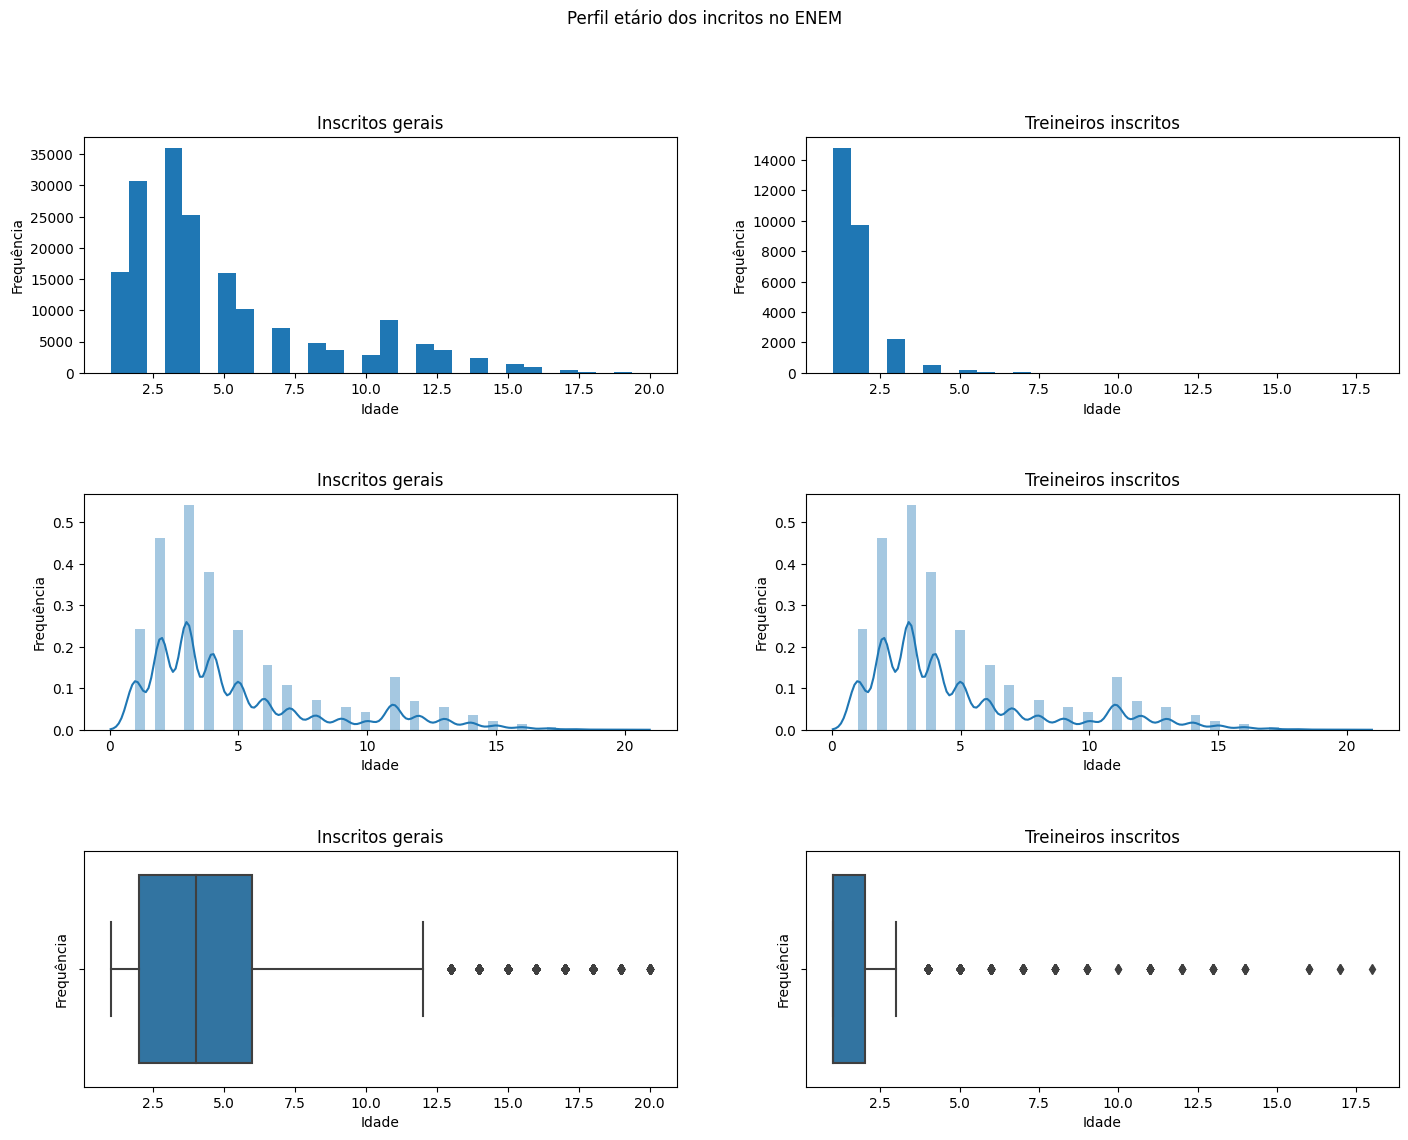

In [21]:
# criando a figura
fig, ax = plt.subplots(3, 2, figsize = (15, 12))

# adicionando o título da figura
fig.suptitle('Perfil etário dos incritos no ENEM')

# inserindo um histograma da idade no eixo ax[0,0] --primeiro gráfico
ax[0,0].hist(df[var_idade], bins = 30)

# alterando os labels do eixo ax[0,0]
ax[0,0].set(xlabel = 'Idade', ylabel = 'Frequência')
ax[0,0].set_title('Inscritos gerais')

# inserindo um histograma da idade dos treineiros no eixo ax[0,1] --segundo gráfico
ax[0,1].hist(treineiro[var_idade], bins = 30)

# alterando os labels do eixo ax[0,1]
ax[0,1].set(xlabel = 'Idade', ylabel = 'Frequência')
ax[0,1].set_title('Treineiros inscritos')

# inserindo distribuição dos inscritos gerais no eixo ax[1,0]
sns.distplot(df[var_idade], ax = ax[1,0])

# alterando os labels
ax[1,0].set(xlabel = 'Idade', ylabel = 'Frequência', title = 'Inscritos gerais')

# inserindo distribuição dos treineiros no eixo ax[1,1]
sns.distplot(df[var_idade], ax = ax[1,1])

# alterando os labels
ax[1,1].set(xlabel = 'Idade', ylabel = 'Frequência', title = 'Treineiros inscritos')

# inserindo boxplot dos incritos gerais no eixo ax[2,0]
sns.boxplot(data = df, x = var_idade, ax = ax[2,0])

# alterando os labels
ax[2,0].set(xlabel = 'Idade', ylabel = 'Frequência', title = 'Inscritos gerais')

# inserindo boxplot dos treineiros no eixo ax[2,1]
sns.boxplot(data = treineiro, x = var_idade, ax = ax[2,1])

# alterando os labels
ax[2,1].set(xlabel = 'Idade', ylabel = 'Frequência', title = 'Treineiros inscritos')

# ajustando o distanciamento entre os gráficos
plt.tight_layout(pad = 4)

**Perfil de Gênero**

[Text(0.5, 0, 'Sexo'),
 Text(0, 0.5, 'Quantidade'),
 Text(0.5, 1.0, 'Proporção entre os gêneros')]

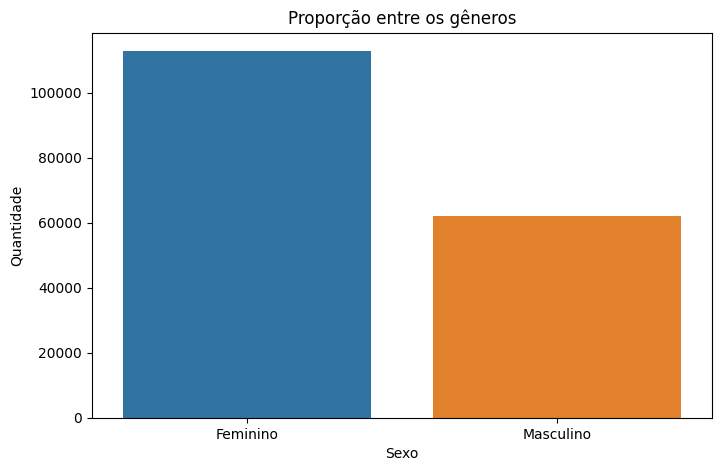

In [22]:
fig, ax = plt.subplots( figsize = (8, 5))
sns.countplot(data = df, x = 'TP_SEXO', ax = ax)
ax.set(xlabel = 'Sexo', ylabel = 'Quantidade', title = 'Proporção entre os gêneros')

**Estado Civil**

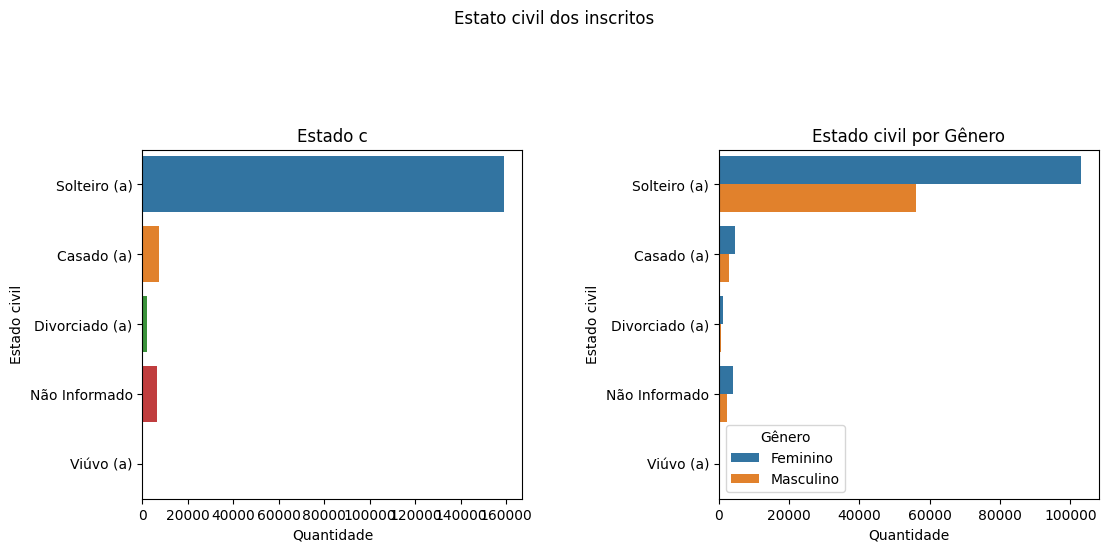

In [23]:
fig, ax = plt.subplots(1,2, figsize = (12, 6))

sns.countplot(
    data = df,
    y = 'TP_ESTADO_CIVIL',
    ax = ax[0]
)

sns.countplot(
    data = df,
    y = 'TP_ESTADO_CIVIL',
    ax = ax [1],
    hue = 'TP_SEXO'
)

ax[0].set(xlabel = 'Quantidade', ylabel = 'Estado civil', title = 'Estado c')
ax[1].set(xlabel = 'Quantidade', ylabel = 'Estado civil', title = 'Estado civil por Gênero')
ax[1].legend(title = 'Gênero')
fig.suptitle('Estato civil dos inscritos')
fig.tight_layout(pad = 4)

**Cor, raça e nacionalidade**

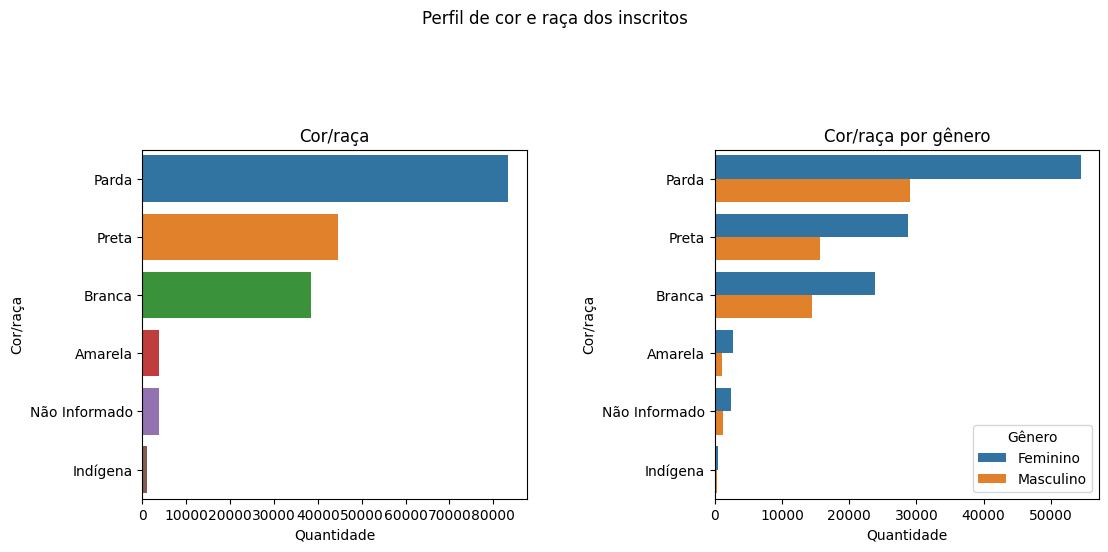

In [24]:
gerar_painel_barra(df, 'TP_COR_RACA', 'TP_SEXO',
                   title = 'Perfil de cor e raça dos inscritos',
                   title_subplot_1 = 'Cor/raça',
                   title_subplot_2 = 'Cor/raça por gênero',
                   legend_subplot_2 = 'Gênero',
                   ylabel = 'Cor/raça')

**Análise univariada das provas**

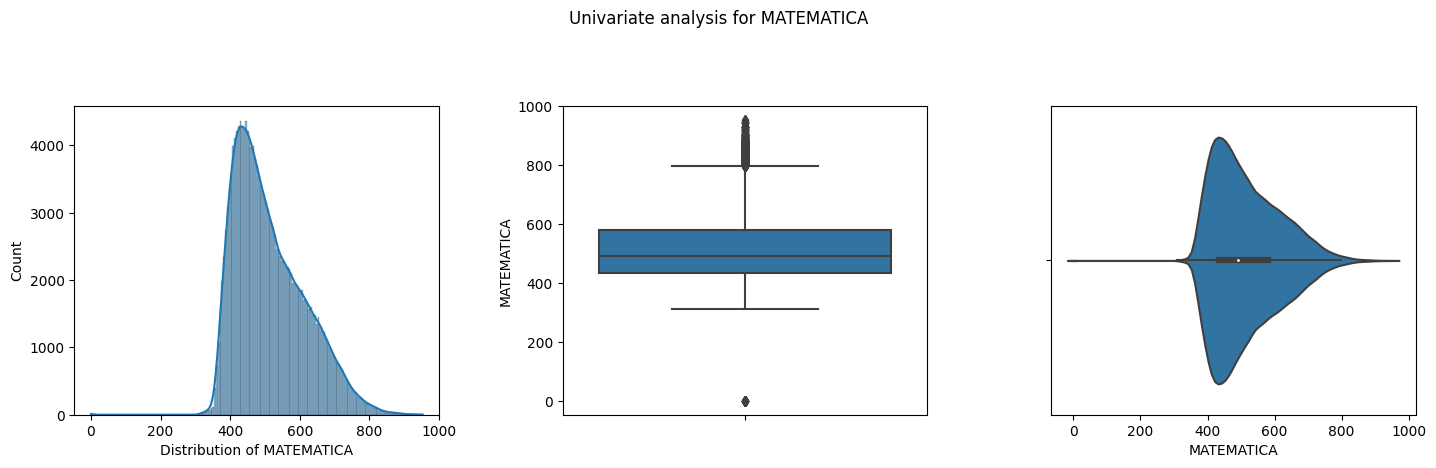

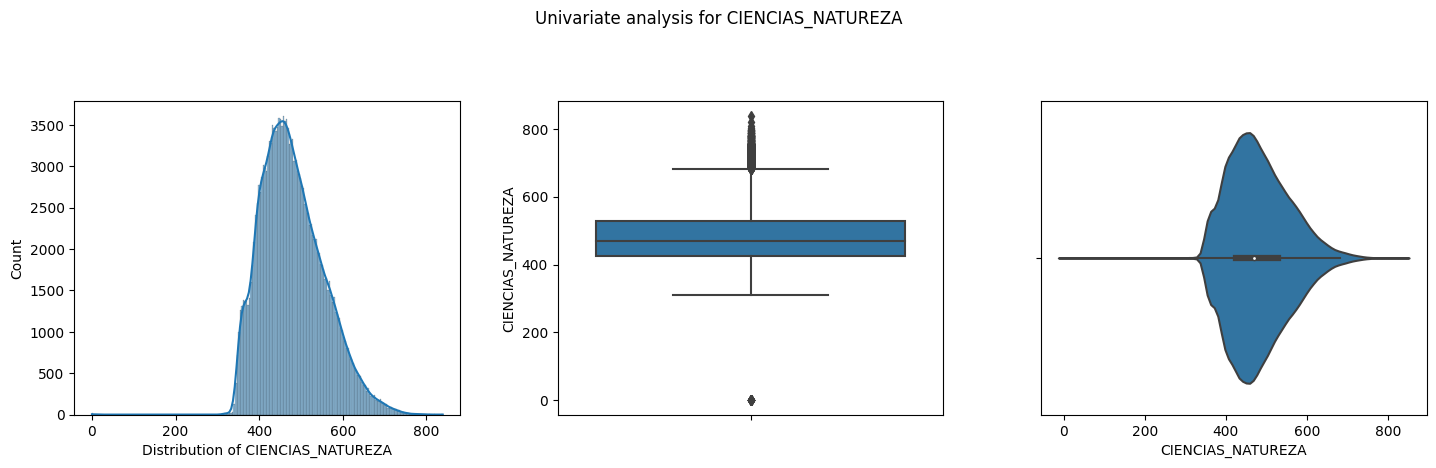

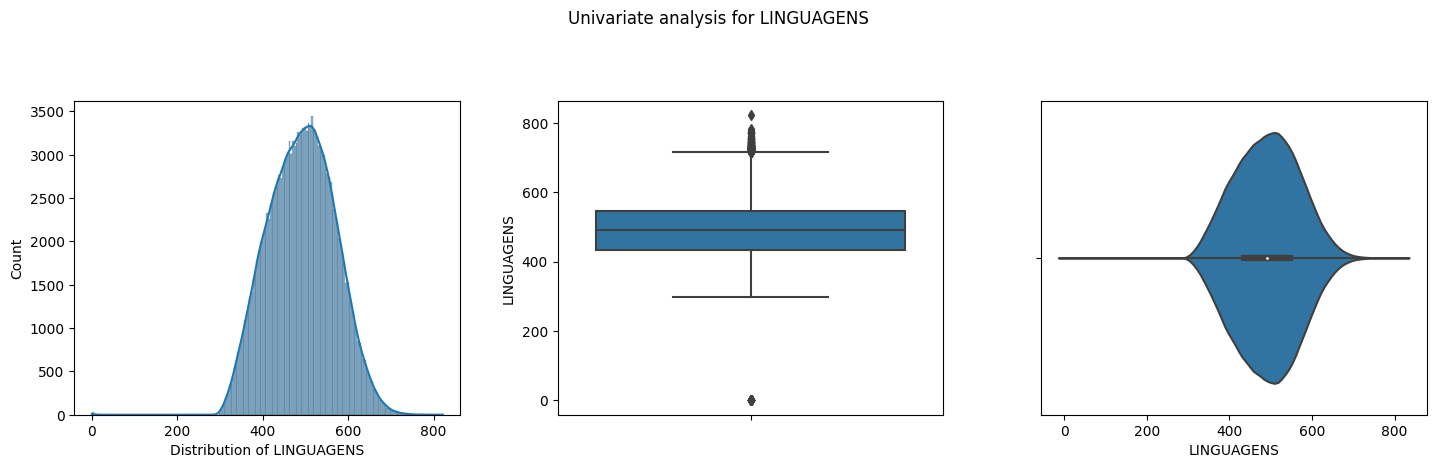

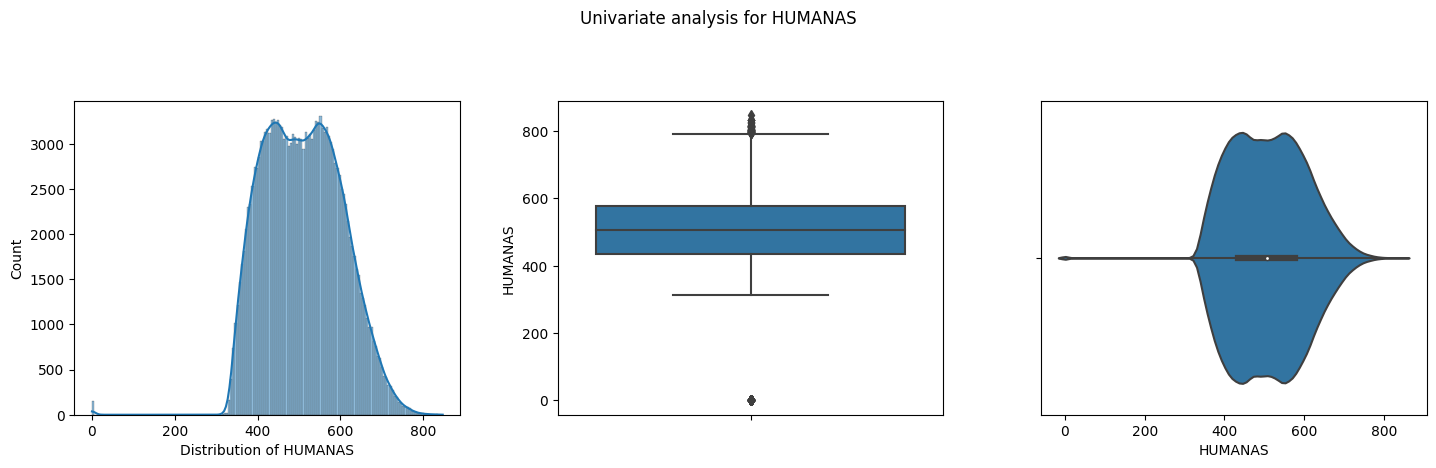

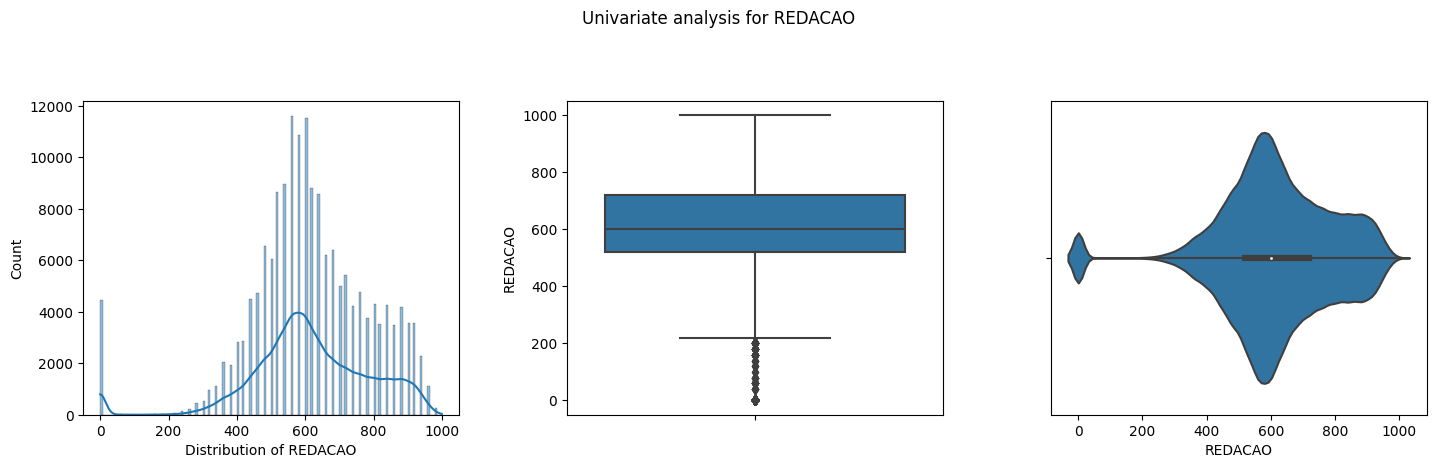

In [25]:
univariate_analysis(provas, data = df)

**Heatmap das provas**

<Axes: >

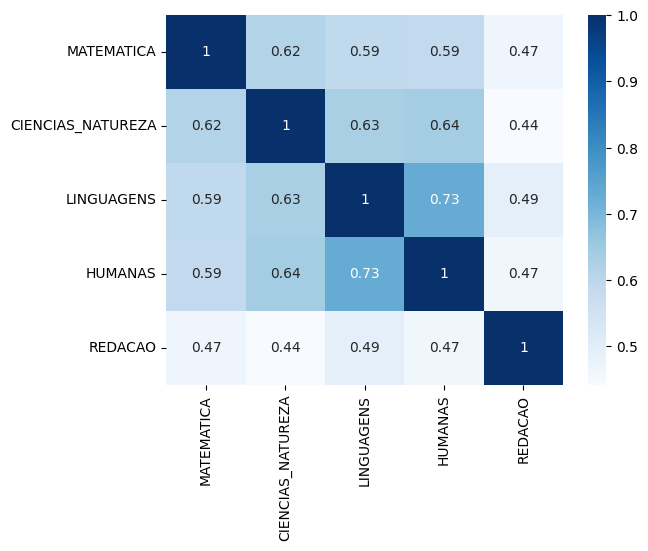

In [26]:
fig, ax = plt.subplots()
corr_provas = df[provas].corr()
sns.heatmap(corr_provas, annot=True, cmap = 'Blues', ax = ax)

In [27]:
#figure = sns.pairplot(df[provas+['TP_SEXO']], hue = 'TP_SEXO')

<Axes: >

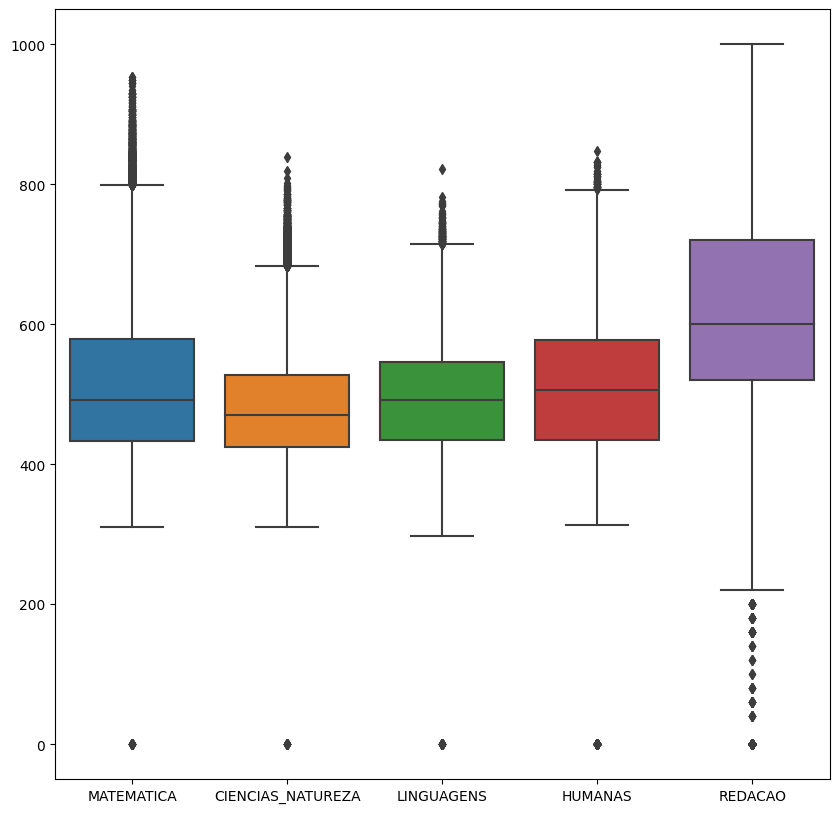

In [28]:
# inserindo boxplot com informações das provas
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = df[provas], ax = ax)

**Desempenho escolar por renda familiar**

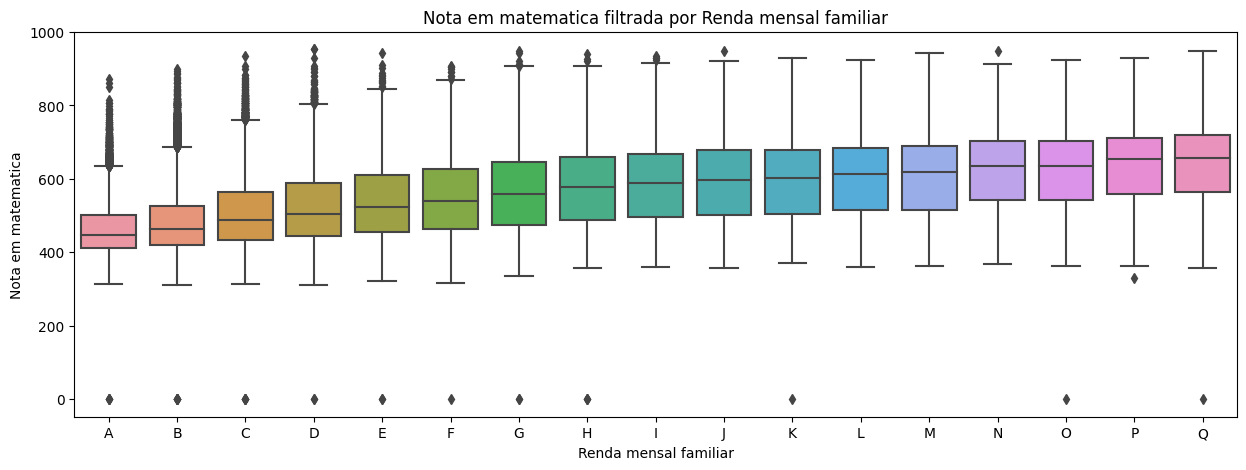

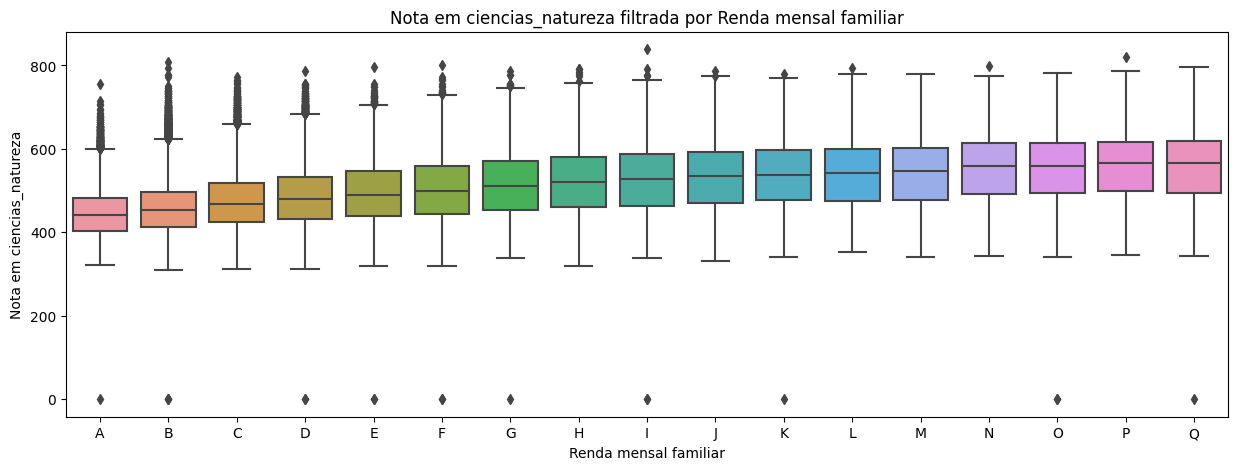

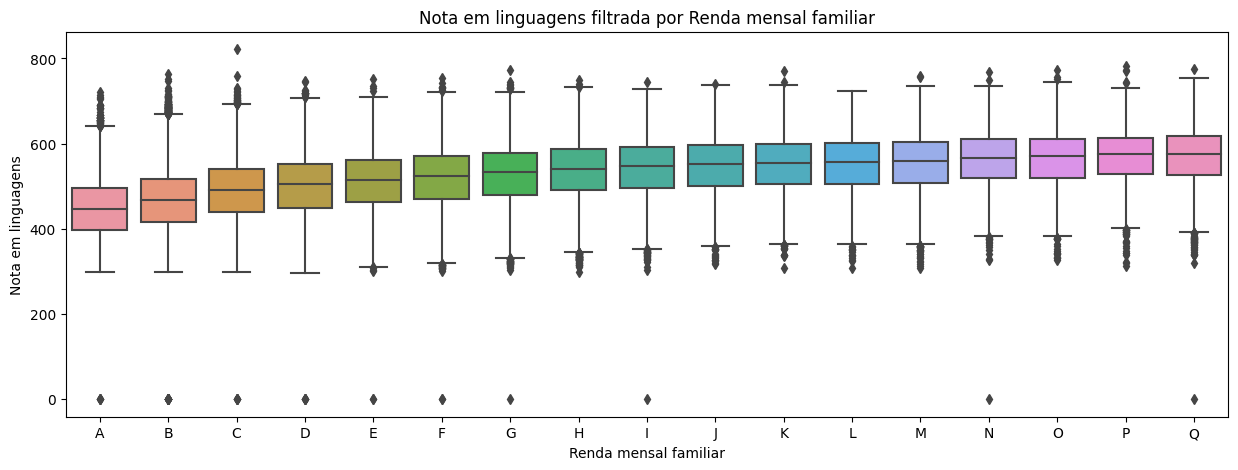

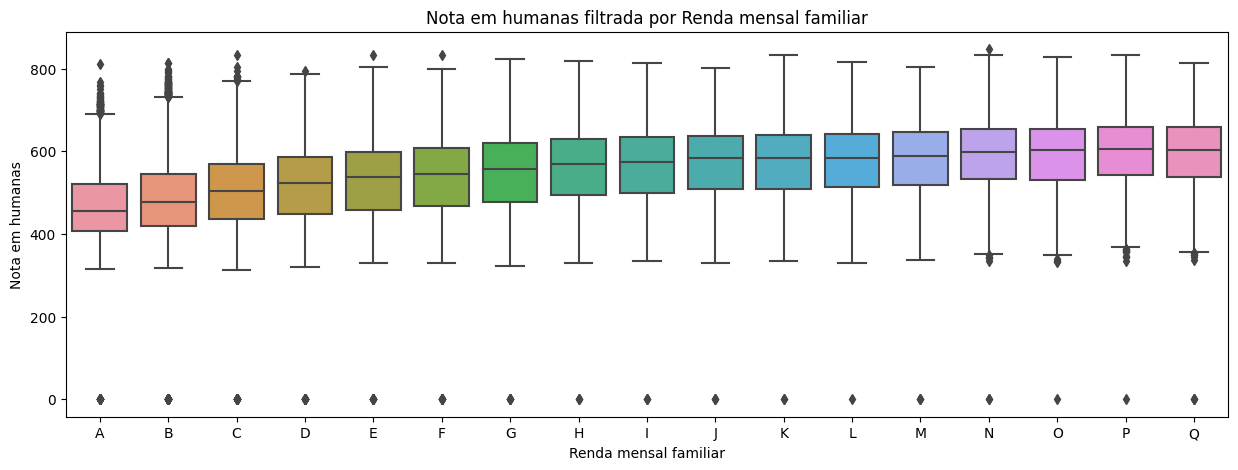

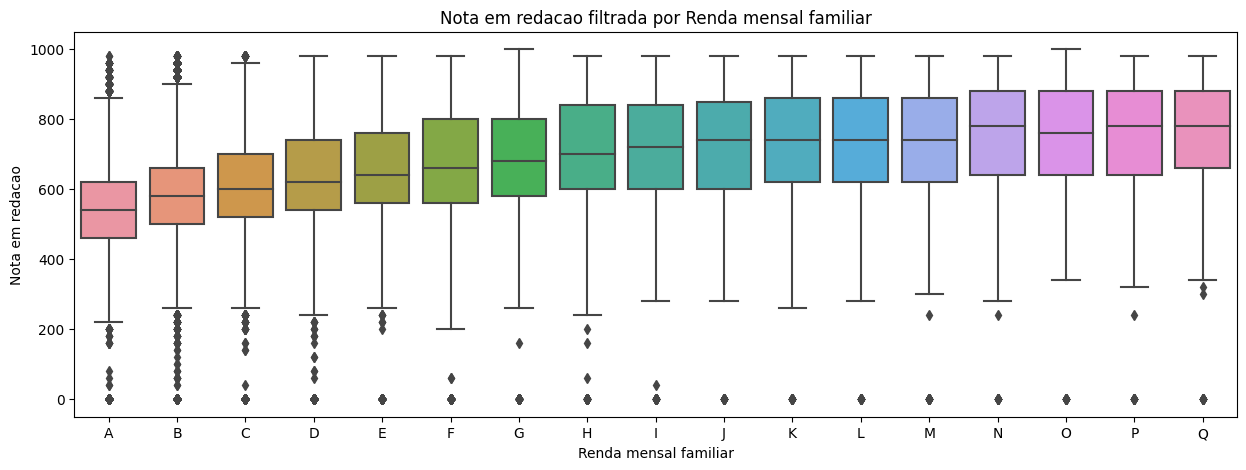

In [29]:
renda_ordenada = df['renda_mensal_familiar'].unique()
renda_ordenada.sort()
boxplot_por_filtro('renda_mensal_familiar', df, renda_ordenada)

**Adicionando a variável Tipo de Escola à análise**

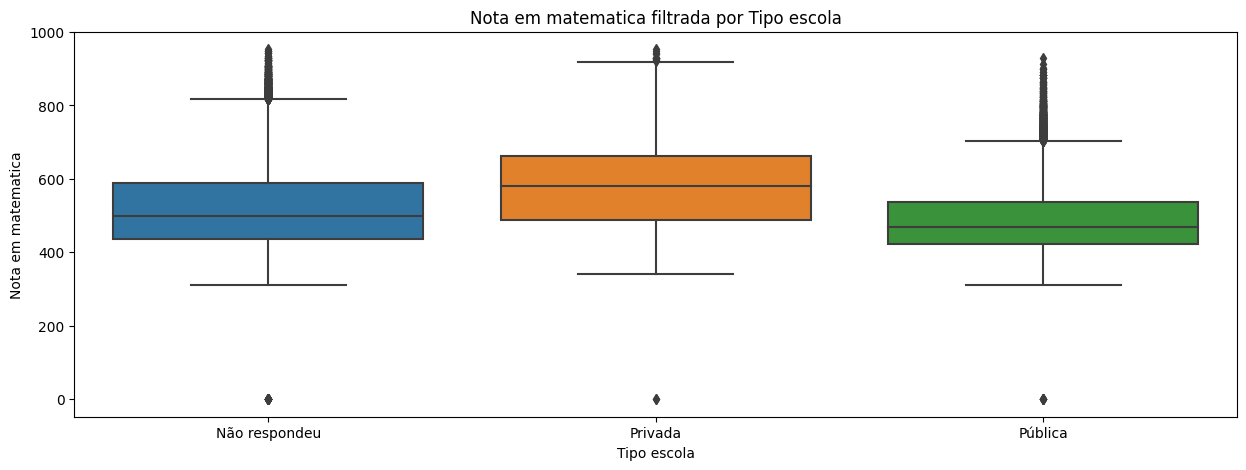

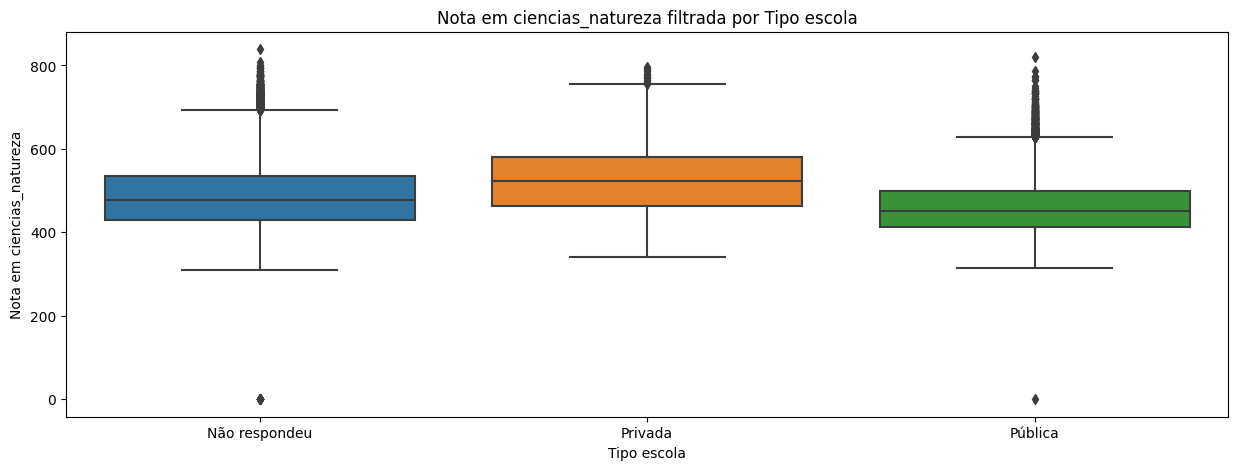

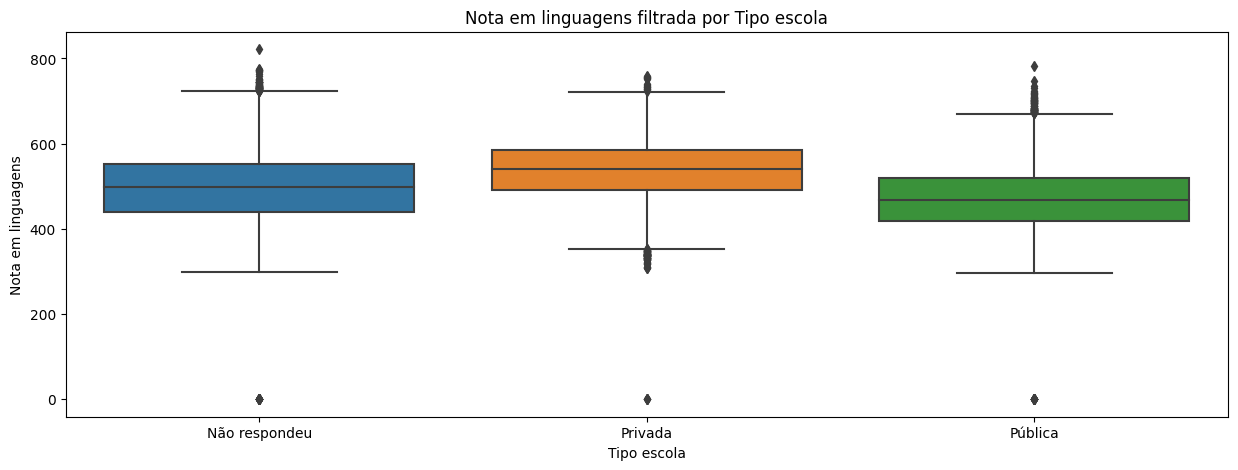

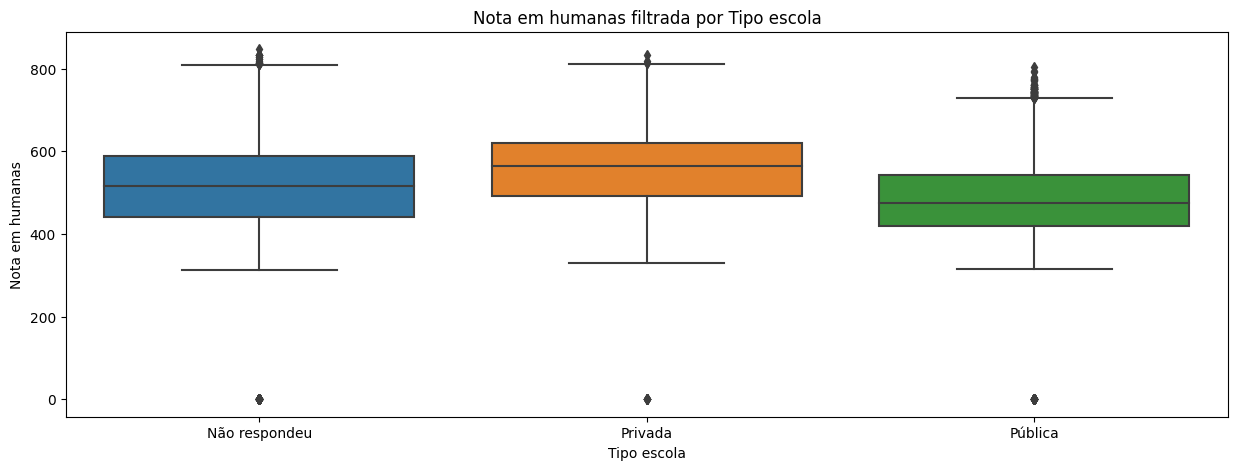

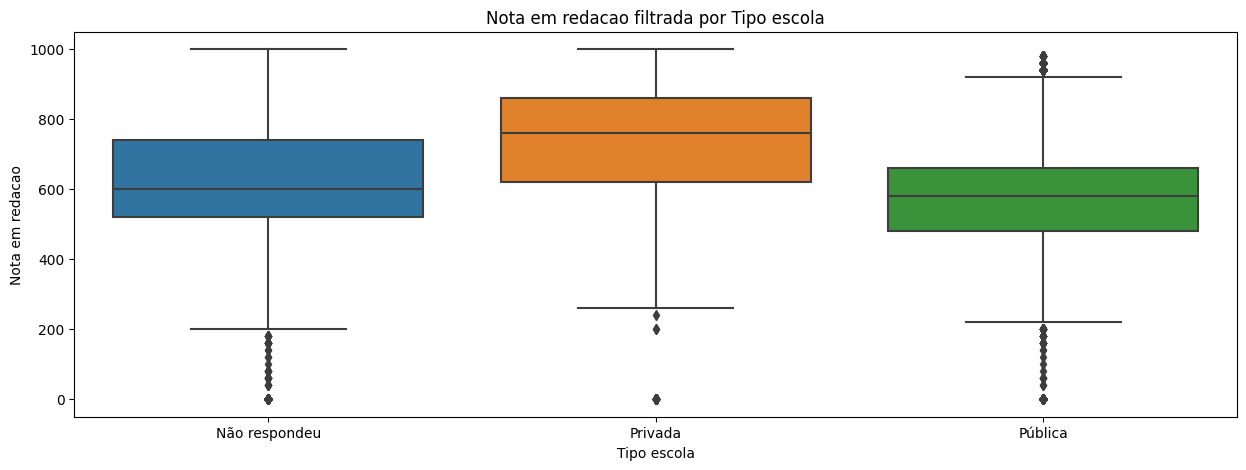

In [30]:
renda_ordenada = df['TIPO_ESCOLA'].unique()
renda_ordenada.sort()
boxplot_por_filtro('TIPO_ESCOLA', df, renda_ordenada)

**Desempenho por escolaridade da mãe**

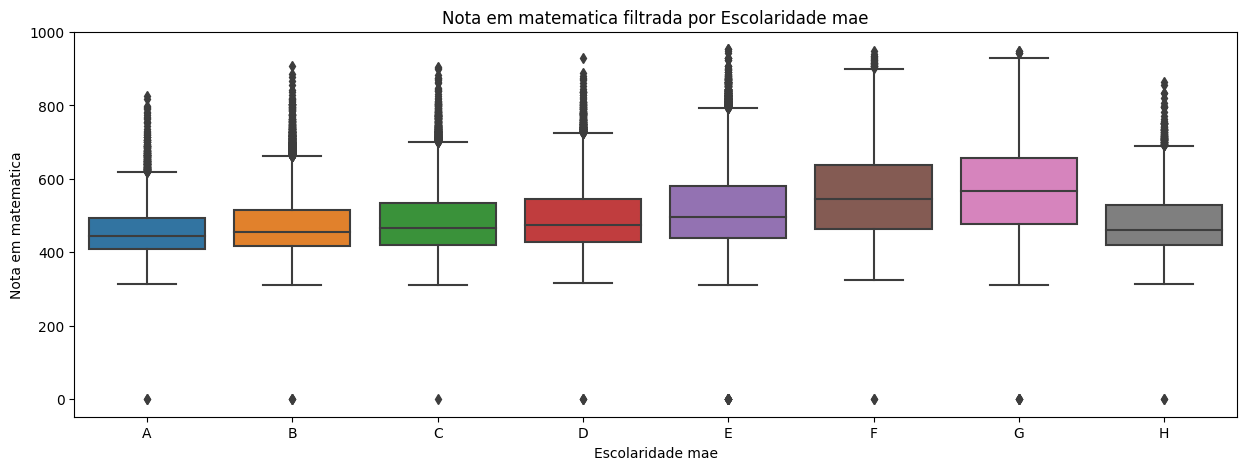

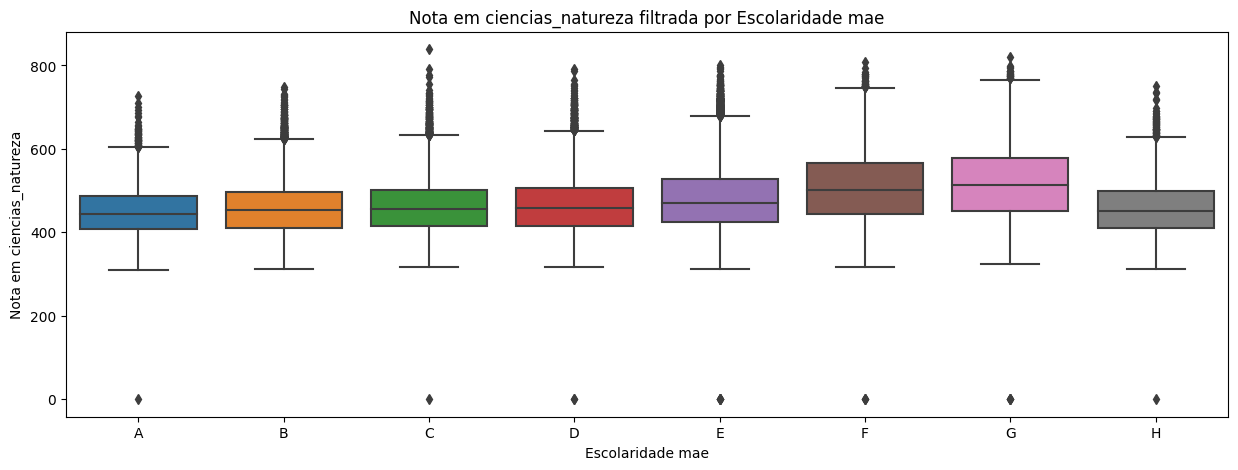

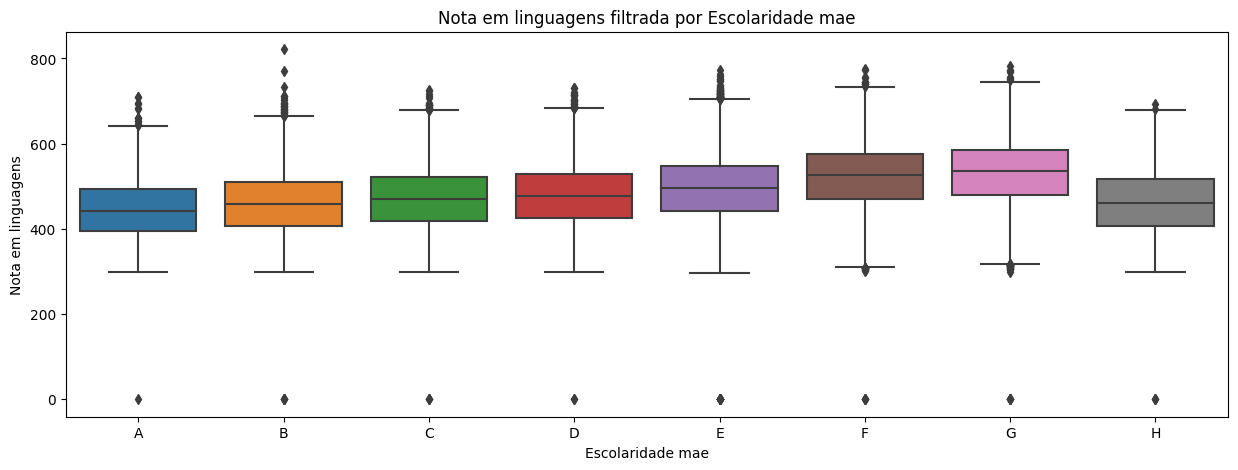

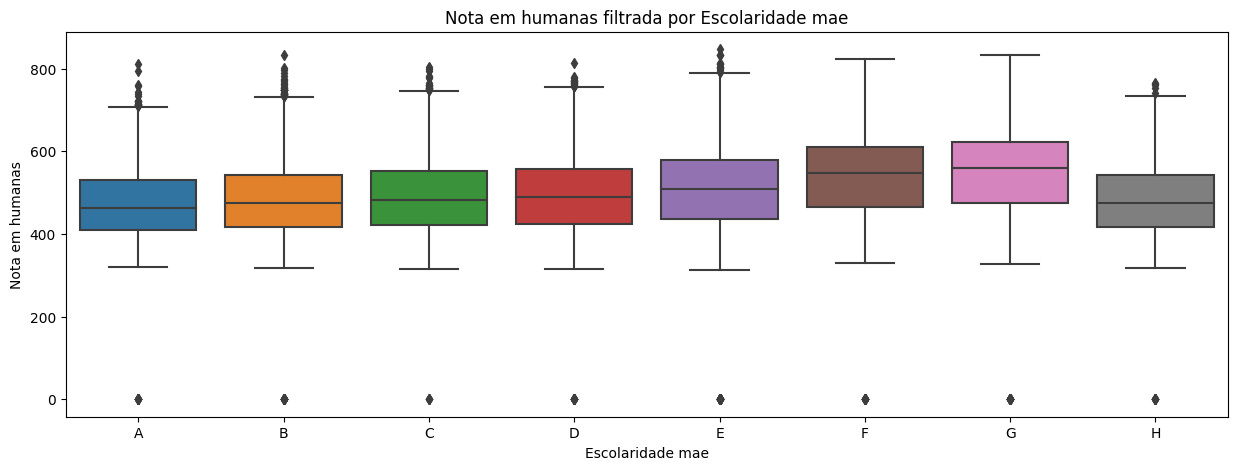

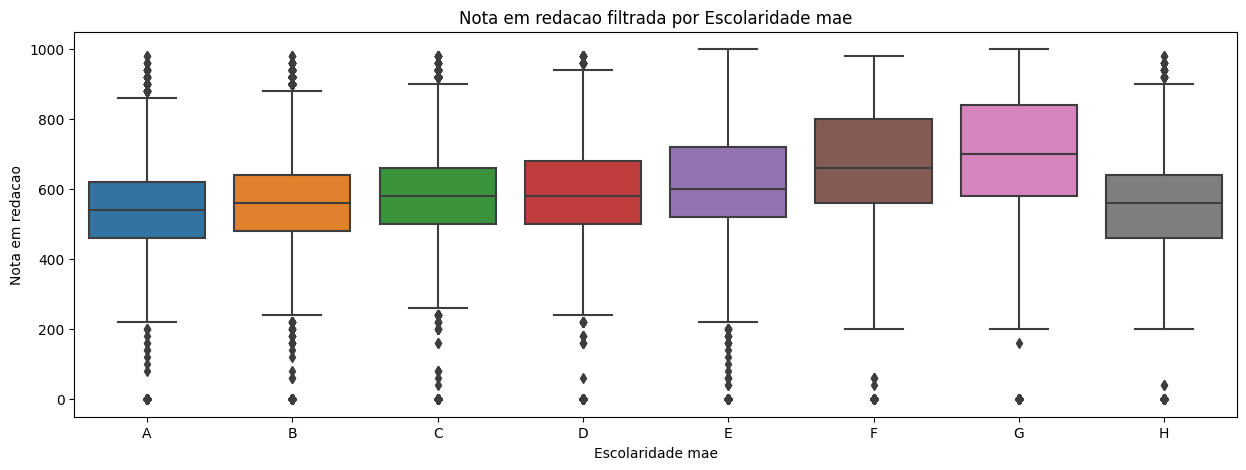

In [31]:
escolaridade_mae_ordenada = df['escolaridade_mae'].unique()
escolaridade_mae_ordenada.sort()
boxplot_por_filtro('escolaridade_mae', df, escolaridade_mae_ordenada)

**Desempenho por escolaridade do pai**

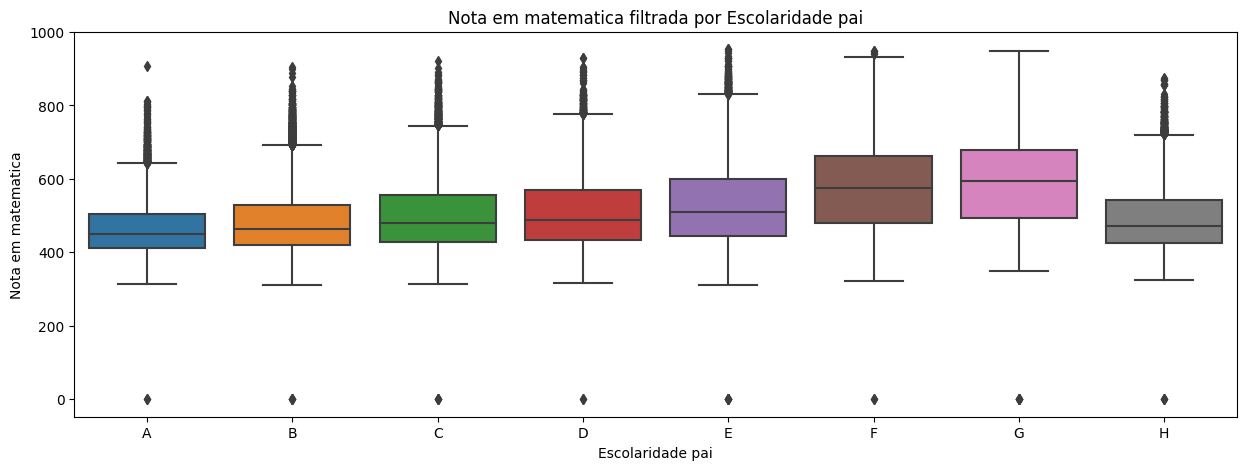

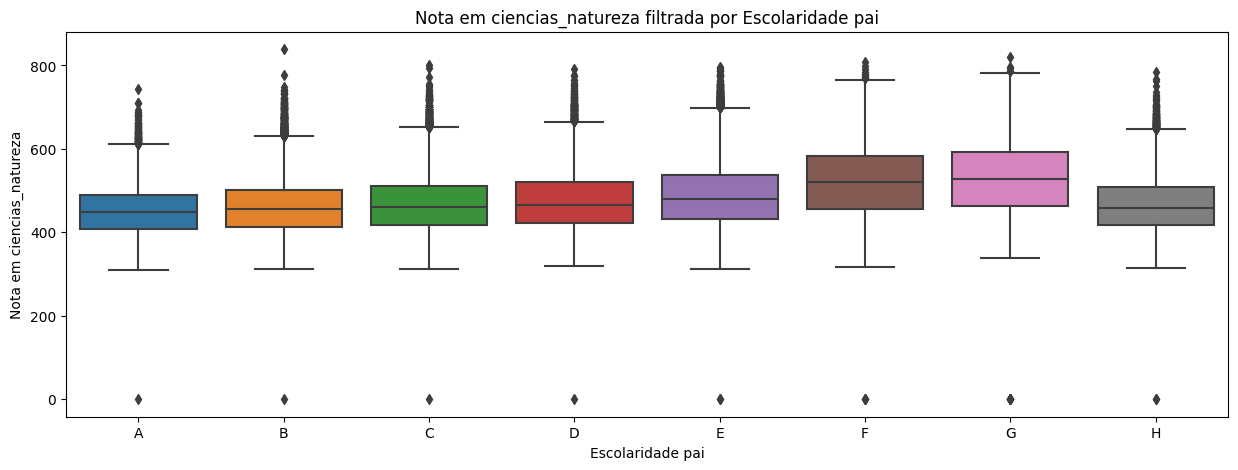

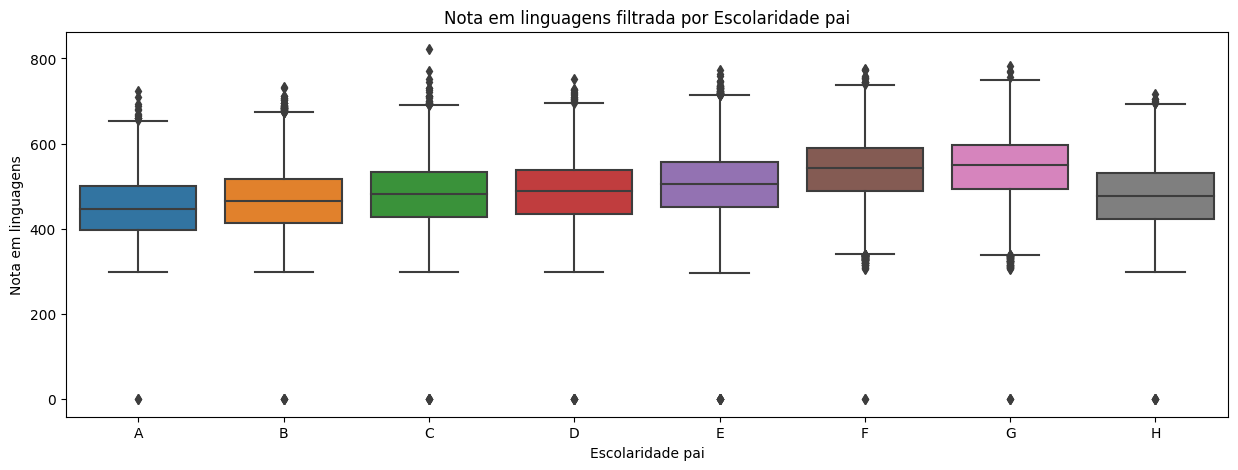

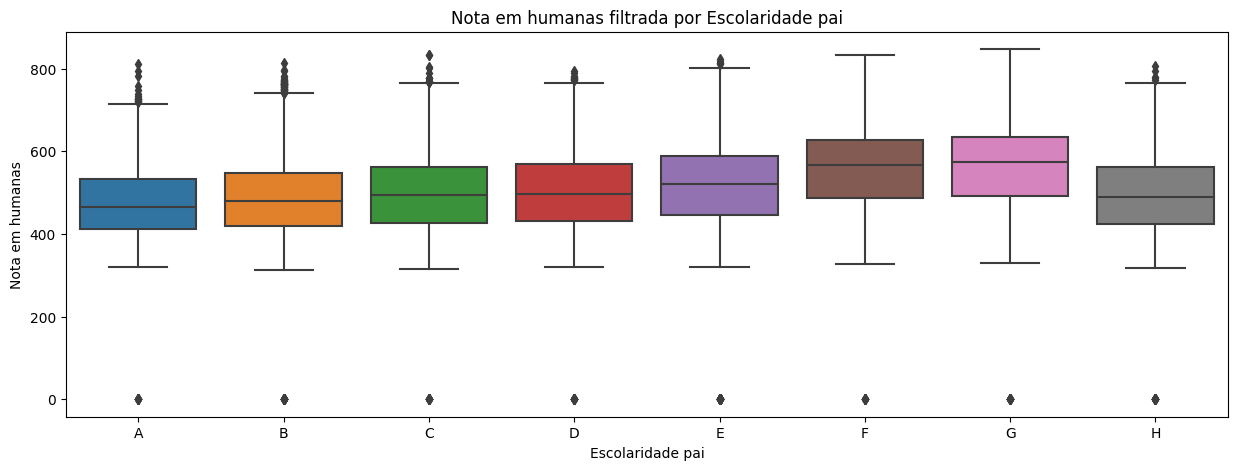

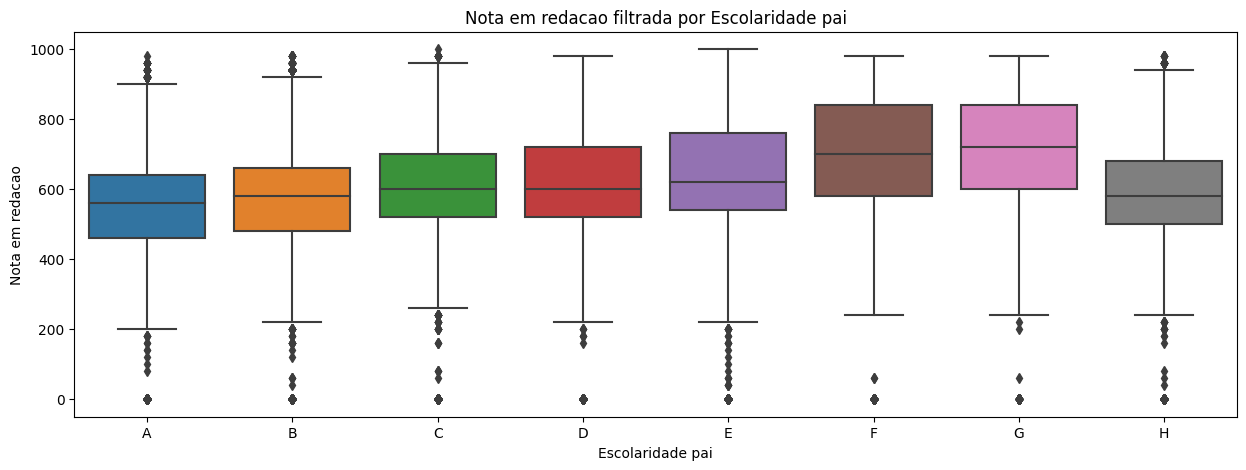

In [32]:
escolaridade_pai_ordenada = df['escolaridade_pai'].unique()
escolaridade_pai_ordenada.sort()
boxplot_por_filtro('escolaridade_pai', df, escolaridade_pai_ordenada)

# **ENEM visão município e Análise Geoespacial**

In [33]:
df_visao_municipio = (
    df_raw
    .query('NU_NOTA_MT != 0')
    .groupby(by = ['NO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_PROVA'], as_index = False)['NU_NOTA_MT']
    .agg([np.min, np.mean, np.median, np.max])
    .reset_index(drop = False)
    .rename(
        columns = {
            'CO_MUNICIPIO_PROVA' : 'COD_IBGE',
            'NO_MUNICIPIO_PROVA' : 'MUNICIPIO',
            'amin' : 'MINIMO_MT',
            'mean' : 'MEDIA_MT',
            'median' : 'MEDIANA_MT',
            'amax' : 'MAXIMO_MT'
        }
    )
    .sort_values(by = ['MAXIMO_MT', 'MEDIA_MT', 'MEDIANA_MT'], ascending = False)
    .reset_index(drop = True)
)


df_quantidade_inscritos = (
    df_raw.groupby(by = ['NO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_PROVA'], as_index = False)['NU_INSCRICAO']
    .count()
    .rename(
        columns = {
            'CO_MUNICIPIO_PROVA' : 'COD_IBGE',
            'NO_MUNICIPIO_PROVA' : 'MUNICIPIO',
            'NU_INSCRICAO' : 'QUANTIDADE_INSCRITOS'
        }
    )
    .sort_values(by = ['QUANTIDADE_INSCRITOS'], ascending = False)
    .reset_index(drop = True)

)

In [34]:
total = df_quantidade_inscritos.QUANTIDADE_INSCRITOS.sum()

df_quantidade_inscritos['PERCENTUAL_INSCRITOS'] = (df_quantidade_inscritos.QUANTIDADE_INSCRITOS / total * 100).round(2)

df_quantidade_inscritos['NU_ANO'] = 2021

df_municipio = pd.merge(
    df_visao_municipio.drop(columns = ['MUNICIPIO']),
    df_quantidade_inscritos,
    on = 'COD_IBGE',
    how = 'inner'
)

In [35]:
df_municipio.head()

,index,COD_IBGE,MINIMO_MT,MEDIA_MT,MEDIANA_MT,MAXIMO_MT,MUNICIPIO,QUANTIDADE_INSCRITOS,PERCENTUAL_INSCRITOS,NU_ANO
0,160,2933307,315.5,536.491289,517.30,953.1,Vitória da Conquista,10792,4.05,2021
1,125,2927408,315.3,534.623544,515.60,953.1,Salvador,58502,21.98,2021
2,9,2903201,318.8,517.589528,496.80,948.8,Barreiras,6083,2.29,2021
3,51,2910800,316.0,525.103365,502.90,948.5,Feira de Santana,16689,6.27,2021
4,139,2930501,346.8,501.138564,479.85,948.5,Serrinha,2802,1.05,2021


**Quantidade de inscritos por município**

<Axes: ylabel='MUNICIPIO'>

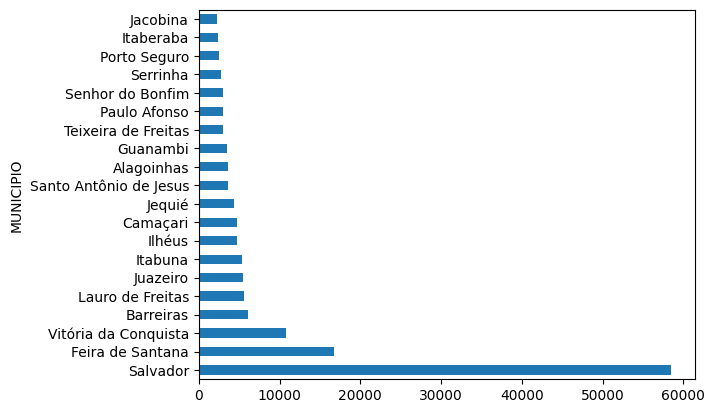

In [36]:
(df_municipio
 .nlargest(n = 20, columns = 'QUANTIDADE_INSCRITOS')
 .set_index('MUNICIPIO')['QUANTIDADE_INSCRITOS']
 .plot(kind = 'barh')
)

**Análise espacial**

In [37]:
!pip install descartes

In [38]:
# buscando dados dos municípios da Bahia

ba_muni = geobr.read_municipality(code_muni = 'BA', year = 2010)

(-47.08089426261155,
 -36.87734914850943,
 -18.839273585452574,
 -8.04203709391265)

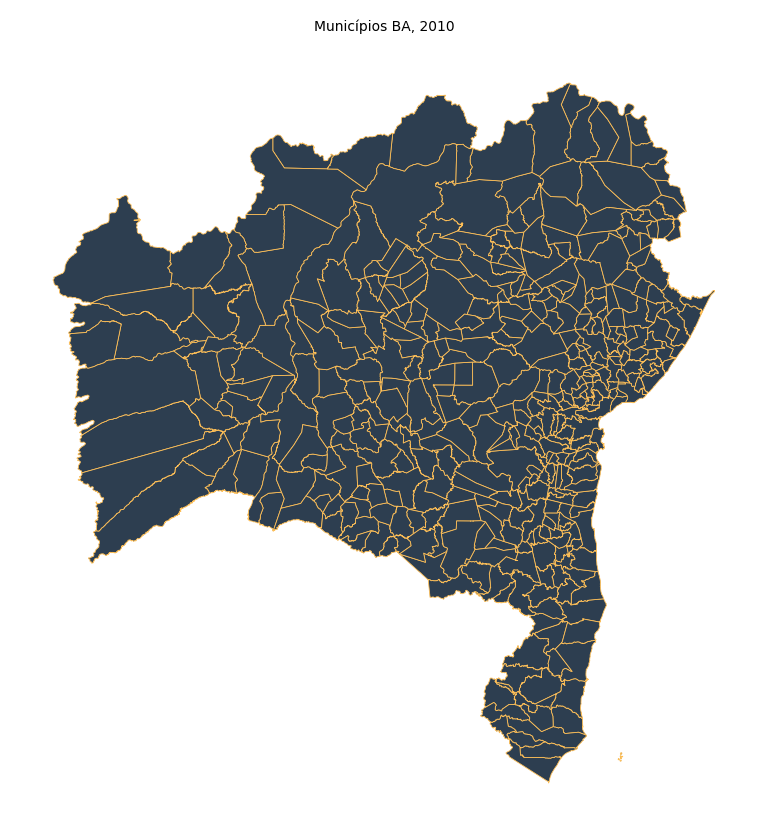

In [39]:
# plotando o mapa

fig, ax = plt.subplots(figsize = (5,5), dpi = 200)
ba_muni.plot(facecolor = "#2D3E50", edgecolor = "#FEBF57", linewidth = 0.3, ax=ax)
ax.set_title("Municípios BA, 2010", fontsize = 5)
ax.axis('off')

In [40]:
ba_muni.head(1)

,code_muni,name_muni,code_state,abbrev_state,geometry
0,2900108.0,Abaíra,29.0,BA,"POLYGON ((-41.86249 -13.22967, -41.84277 -13.2..."


In [43]:
df_municipio.shape

(162, 10)

In [49]:
df_geospatial_enem = ba_muni.merge(df_municipio,
                                  left_on = 'code_muni',
                                   right_on = 'COD_IBGE',
                                  how = 'left')

In [46]:
df_geospatial_enem.head()

,code_muni,name_muni,code_state,abbrev_state,geometry,index,COD_IBGE,MINIMO_MT,MEDIA_MT,MEDIANA_MT,MAXIMO_MT,MUNICIPIO,QUANTIDADE_INSCRITOS,PERCENTUAL_INSCRITOS,NU_ANO
0,2900108.0,Abaíra,29.0,BA,"POLYGON ((-41.86249 -13.22967, -41.84277 -13.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2900207.0,Abaré,29.0,BA,"POLYGON ((-39.47375 -8.87667, -39.49158 -8.835...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2900306.0,Acajutiba,29.0,BA,"POLYGON ((-38.04594 -11.74417, -38.05145 -11.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2900355.0,Adustina,29.0,BA,"POLYGON ((-38.02320 -10.44947, -38.02220 -10.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2900405.0,Água Fria,29.0,BA,"POLYGON ((-38.73384 -11.69606, -38.72949 -11.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# verificando volumetria

ba_muni.shape, df_municipio.shape, df_geospatial_enem.shape

((417, 5), (162, 10), (417, 15))

In [53]:
df_geospatial_enem = df_geospatial_enem.fillna(-999)

In [54]:
df_geospatial_enem.isna().sum()

code_muni               0
name_muni               0
code_state              0
abbrev_state            0
geometry                0
index                   0
COD_IBGE                0
MINIMO_MT               0
MEDIA_MT                0
MEDIANA_MT              0
MAXIMO_MT               0
MUNICIPIO               0
QUANTIDADE_INSCRITOS    0
PERCENTUAL_INSCRITOS    0
NU_ANO                  0
dtype: int64

(-47.08089426261155,
 -36.87734914850943,
 -18.839273585452574,
 -8.04203709391265)

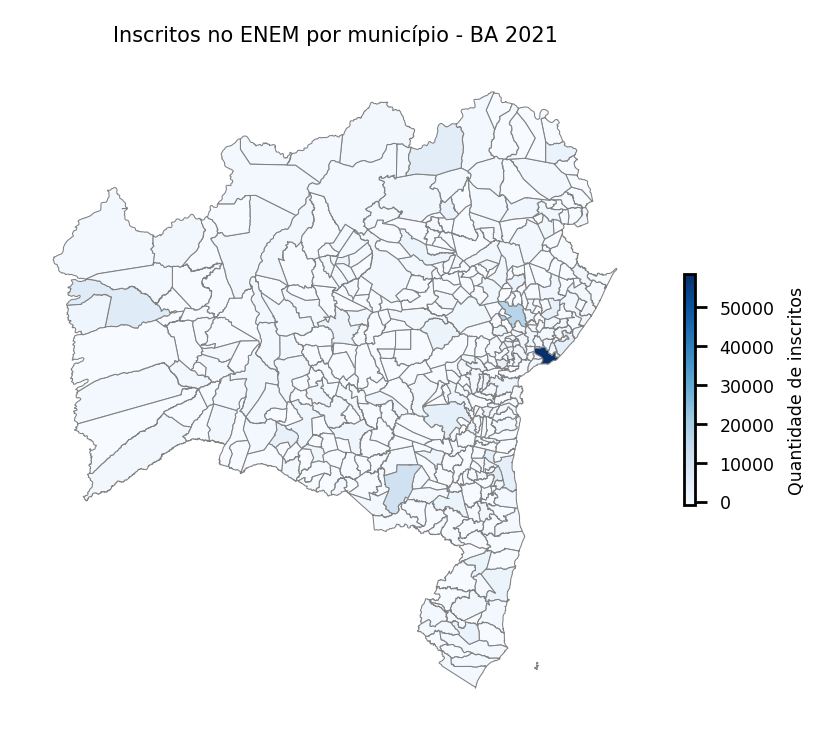

In [59]:
plt.rcParams.update({'font.size': 5})

fig, ax = plt.subplots(figsize = (4, 4), dpi = 250)

df_geospatial_enem.plot(
    column = 'QUANTIDADE_INSCRITOS',
    cmap = 'Blues',
    legend = True,
    edgecolor = 'gray',
    linewidth = 0.3,
    legend_kwds = {
        'label': 'Quantidade de inscritos',
        'orientation': 'vertical',
        'shrink' : 0.3
    },
    ax = ax
)

ax.set_title('Inscritos no ENEM por município - BA 2021')
ax.axis('off')

(-47.08089426261155,
 -36.87734914850943,
 -18.839273585452574,
 -8.04203709391265)

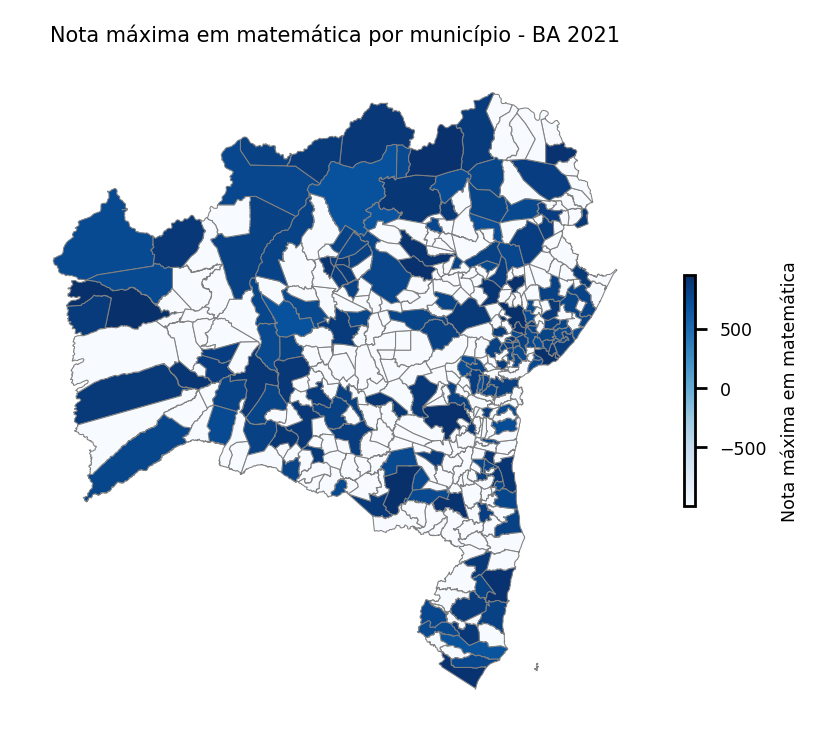

In [65]:
plt.rcParams.update({'font.size' : 5})

fig, ax = plt.subplots(figsize = (4, 4), dpi = 250)

df_geospatial_enem.plot(
    column = 'MAXIMO_MT',
    cmap = 'Blues',
    legend = True,
    edgecolor = 'gray',
    linewidth = 0.3,
    legend_kwds = {
        'label' : 'Nota máxima em matemática',
        'orientation' : 'vertical',
        'shrink' : 0.3
    },
    ax = ax
)

ax.set_title('Nota máxima em matemática por município - BA 2021')
ax.axis('off')